In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [13]:
import imutils

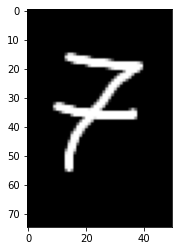

In [56]:
image = cv2.imread("7big.png")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [38]:
image.shape

(28, 28)

In [39]:
max(image.shape)

28

In [19]:
min(image.shape)

50

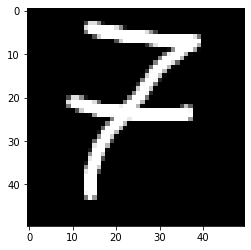

In [57]:
croped = image[12:62, 0:50]
plt.imshow(croped)

In [58]:
croped.shape

(50, 50, 3)

In [59]:
def crop_and_reshape (image):
    size = image.shape
    h = size[0]
    w = size[1]
    if (h == 28) and (w == 28):
        return image
    if h > w:
        reduced = imutils.resize(image, width=28)
        mid = reduced.shape[0] // 2
        croped = reduced[(mid-14):(mid+14), 0:28]
    elif h < w:
        reduced = imutils.resize(image, heigth=28)
        mid = reduced.shape[1] // 2
        croped = reduced[0:28, (mid-14):(mid+14)]
    else:
        croped = imutils.resize(image, heigth=28)
    return croped

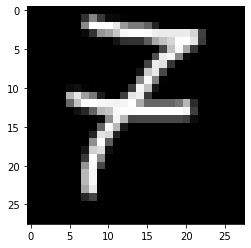

In [60]:
figfinal = crop_and_reshape(image)
plt.imshow(figfinal)

In [61]:
def loadimage(figname):
    '''
    It takes the name of the file and loads it in grey scale
    Input: name of the file
    Output: the image in greyscale
    '''
    print(figname)
    image = cv2.imread(figname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [52]:
name = "Num7.png"
loadimage(name)

Num7.png


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 207, 191,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 191, 255, 255, 255, 255, 255,
        255, 207,  16,  16, 207, 255, 255, 249,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [97]:
inverted = cv2.bitwise_not(image)


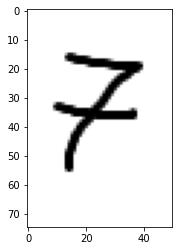

In [98]:
plt.imshow(inverted)

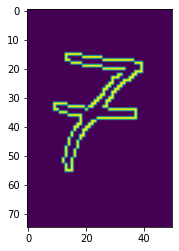

In [99]:
edged = cv2.Canny(image, 0, 0)
plt.imshow(edged)

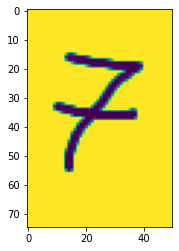

In [102]:
imgray = cv2.cvtColor(inverted, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)

In [103]:
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

In [104]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [108]:
contours

[array([[[ 0,  0]],
 
        [[ 0, 74]],
 
        [[49, 74]],
 
        [[49,  0]]], dtype=int32),
 array([[[14, 14]],
 
        [[16, 14]],
 
        [[17, 15]],
 
        [[21, 15]],
 
        [[22, 16]],
 
        [[28, 16]],
 
        [[29, 17]],
 
        [[38, 17]],
 
        [[40, 19]],
 
        [[40, 20]],
 
        [[38, 22]],
 
        [[37, 22]],
 
        [[35, 24]],
 
        [[34, 24]],
 
        [[29, 29]],
 
        [[29, 30]],
 
        [[27, 32]],
 
        [[27, 33]],
 
        [[26, 34]],
 
        [[35, 34]],
 
        [[36, 33]],
 
        [[38, 35]],
 
        [[38, 37]],
 
        [[37, 38]],
 
        [[23, 38]],
 
        [[19, 42]],
 
        [[19, 43]],
 
        [[18, 44]],
 
        [[18, 45]],
 
        [[17, 46]],
 
        [[17, 48]],
 
        [[16, 49]],
 
        [[16, 55]],
 
        [[15, 56]],
 
        [[14, 56]],
 
        [[12, 54]],
 
        [[12, 48]],
 
        [[13, 47]],
 
        [[13, 45]],
 
        [[14, 44]],
 
        [[14, 43]],

In [110]:
cnt = contours[0]
cv.drawContours(inverted, [cnt], 0, (0,255,0), 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

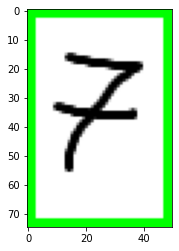

In [111]:
plt.imshow(inverted)

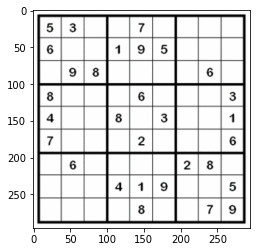

In [138]:
sudoku = cv2.imread("sudoku3.png")
plt.imshow(sudoku)

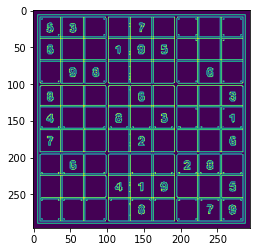

In [139]:
edge_sudoku = cv2.Canny(sudoku, 0, 0)
plt.imshow(edge_sudoku)

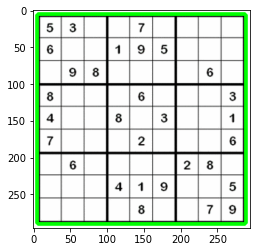

In [140]:
imgray = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]
cv.drawContours(sudoku, [cnt], 0, (0,255,0), 3)
plt.imshow(sudoku)